In [1]:
#Package imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cycler
from math import log10
from scipy import stats
import scipy
from pylab import *
from scipy.optimize import curve_fit
from math import exp, sqrt
from sklearn.linear_model import LinearRegression
from lmfit import Parameters, minimize
import seaborn as sns
        
#GAMES imports
import Settings_COVID_Dx
from Solvers_COVID_Dx import calcChi2, calcRsq, solveSingle
from Run_COVID_Dx import addNoise, solveAll, parityPlot
from Saving_COVID_Dx import createFolder

#Define settings

conditions_dictionary, initial_params_dictionary, data_dictionary = Settings_COVID_Dx.init()
run = conditions_dictionary["run"]
full_path = conditions_dictionary["directory"]
model = conditions_dictionary["model"]
data = conditions_dictionary["data"]
error = data_dictionary["error"]
exp_data = data_dictionary["exp_data"]
timecourses_err = data_dictionary["timecourses_err"]
timecourses_exp = data_dictionary["timecourses"]
x = data_dictionary["x_vals"]
df_data = pd.read_pickle('./PROCESSED DATA EXP.pkl')
df_error = pd.read_pickle('./PROCESSED DATA ERR.pkl')  
plt.style.use('./paper.mplstyle.py')

Main directory created at: 2021-11-30 m2 all echo 1000 + 24 with new icas13 filter no error weighting 2 OM in each direction with more stringent cas13 filter 0.1
***

********************************************
MODULES: []
Total run time (min): 0.0
Total run time (hours): 0.0
********************************************
Main directory created at: 2021-11-30 m2 all echo 1000 + 24 with new icas13 filter no error weighting 2 OM in each direction with more stringent cas13 filter 0.1
***


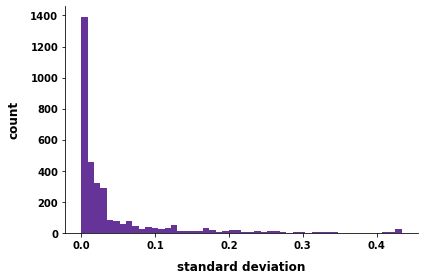

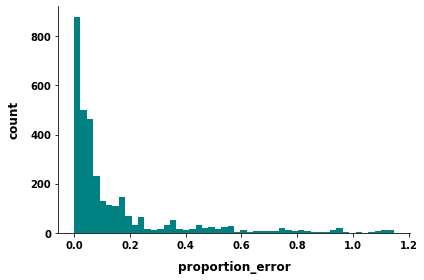

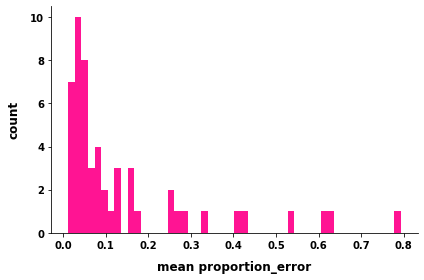

In [5]:
def plotError():
    def chunks(lst, n):
        """Yield successive n-sized chunks from lst."""
        for i in range(0, len(lst), n):
            yield lst[i:i + n]
        
    error_lists = list(chunks(error, 61))
    data_lists = list(chunks(exp_data, 61))
    
    percent_err_lists = []
    percent_err_mean = []
    per_error_means = []
    for i, list_ in enumerate(error_lists):
        data_list = data_lists[i]
        error_list = error_lists[i]
        #print(data_list)
        per_error_list = [j/max(data_list) for j in error_list]
        per_error_means.append(np.mean(per_error_list))
        percent_err_lists.append(per_error_list)
        # if i == 10:
        #     per_error_list = [log10(i) for i in per_error_list]
        #     plt.hist(per_error_list, bins=50, color = 'teal')
    
    
    percentile_99 = np.percentile(per_error_means, 99)
    percentile_95 = np.percentile(per_error_means, 95)
    percentile_90 = np.percentile(per_error_means, 90)
    
    fig = plt.figure()
    plt.hist(error, bins=50, color = 'rebeccapurple')
    plt.xlabel('standard deviation')
    plt.ylabel('count')
    plt.savefig('./error distribution')
    
    def flatten(t):
        return [item for sublist in t for item in sublist]
    
    fig = plt.figure()
    proportion_error = flatten(percent_err_lists)
    plt.hist(proportion_error, bins=50, color = 'teal')
    plt.xlabel('proportion_error')
    plt.ylabel('count')
    plt.savefig('./proportion error distribution')
    
    fig = plt.figure()
    plt.hist(per_error_means, bins=50, color = 'deeppink')
    plt.xlabel('mean proportion_error')
    plt.ylabel('count')
    plt.savefig('./proportion error distribution means only')
    
    return per_error_means
    
per_error_means = plotError()

In [16]:
index_list = []
for i, val in enumerate(per_error_means):
    if val > 0.3:
        print(i)
        print(val)
        print('***')
        index_list.append(i)

index_column = -1
labels = []
for (columnName, columnData) in df_data.iteritems():
    if label == [20.0, 10.0, 0.001, 10.0, 90.0] or label == [20.0, 10.0, 0.001, 0.0, 90.0] or label == [5.0, 2.5, 0.001, 0.0, 90.0]:
        continue
    else:
        index_column += 1
        
    if index_column in index_list:
        label = list(columnData.iloc[0])
        labels.append(label)
        print(index_column)
        print(label)
        print('***')
    
    

        


6
0.3351678530223132
***
15
0.5352990815584777
***
22
0.6234162776380853
***
28
0.605769370715888
***
33
0.42286478370041164
***
37
0.793369887568332
***
49
0.4058456007979378
***
6
[20.0, 0.5, 0.02, 10, 90]
***
15
[5.0, 0.5, 0.02, 10, 90]
***
22
[1.0, 2.5, 0.005, 10, 90]
***
28
[20.0, 10.0, 0.005, 1, 90]
***
33
[20.0, 0.5, 0.02, 1, 90]
***
37
[5.0, 10.0, 0.005, 1, 90]
***
49
[1.0, 2.5, 0.005, 1, 90]
***
